In [1]:
# Pràctica 6 secció 2b


In [2]:
var("x y");

In [3]:
eq1=1.*y+1.*x^2

In [4]:
eq2=-x-1.*x^2-1.*y^2

In [4]:
# He necesitat possar-li els "1." multiplicant per forçar al SAGE a treballar en mode numèric

In [6]:
sol=solve([eq1,eq2],x,y);sol

[[x == (0.3411639019140097 + 1.161541399997252*I), y == (1.232785615938384 - 0.792551992515448*I)], [x == (0.3411639019140097 - 1.161541399997252*I), y == (1.232785615938384 + 0.792551992515448*I)], [x == -0.6823278163374266, y == -0.4655712050078247], [x == 0, y == 0]]

In [7]:
px1=sol[0][0].rhs();px1

0.3411639019140097 + 1.161541399997252*I

In [8]:
py1=sol[0][1].rhs();py1

1.232785615938384 - 0.792551992515448*I

In [9]:
px2=sol[1][0].rhs();px2

0.3411639019140097 - 1.161541399997252*I

In [10]:
py2=sol[1][1].rhs();py2

1.232785615938384 + 0.792551992515448*I

In [11]:
px3=sol[2][0].rhs();px3

-0.6823278163374266

In [12]:
py3=sol[2][1].rhs();py3

-0.4655712050078247

In [13]:
px4=sol[3][0].rhs();px4

0

In [14]:
py4=sol[3][1].rhs();py4

0

In [14]:
# Prescindim de les singularitats complexes

In [15]:
qx=min(px3,px4);qx

-0.6823278163374266

In [16]:
qy=min(py3,py4);qy

-0.4655712050078247

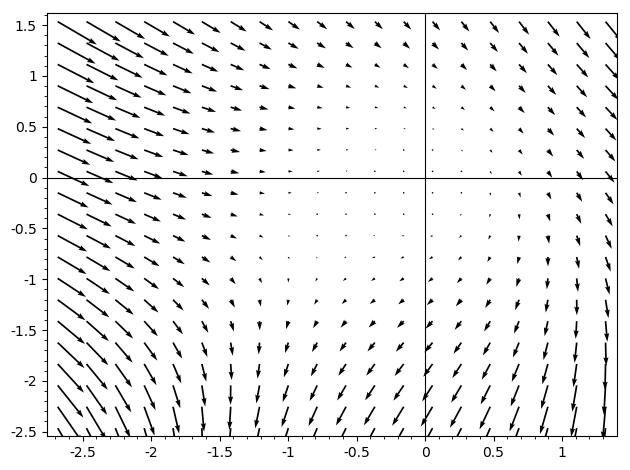

In [17]:
plot=plot_vector_field((eq1,eq2), (x,qx-2,qx+2), (y,qy-2,qy+2));plot

In [18]:
var("t");

In [19]:
# Estudiem primer que és cada punt singular

In [20]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px4,y=py4);A

[ 0  1]
[-1  0]

In [21]:
A.eigenvalues()

[-I, I]

In [22]:
# Pot ser un centre o un focus. No cal integrar res per ara.

In [23]:
# Anem pel darrer punt singular

In [24]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px3,y=py3);A

[ -1.36465563267485                  1]
[0.3646556326748531  0.931142410015649]

In [25]:
A.eigenvalues()

[-1/2393694*sqrt(9639352959517) - 518849/2393694,
 1/2393694*sqrt(9639352959517) - 518849/2393694]

In [26]:
(N(A.eigenvalues()[0]),N(A.eigenvalues()[1]))

(-1.51380240692829, 1.08028918426909)

In [29]:
# Es una sella

In [27]:
px=px3;py=py3;h=0.01;step1=0.01;

In [28]:
vec=A.eigenvectors_right();vec

[(-1/9007199254740992*sqrt(136486645774606000244397840250985) - 1952369988028173/9007199254740992,
  [(1, -1/9007199254740992*sqrt(136486645774606000244397840250985) + 10339355209578861/9007199254740992)],
  1),
 (1/9007199254740992*sqrt(136486645774606000244397840250985) - 1952369988028173/9007199254740992,
  [(1, 1/9007199254740992*sqrt(136486645774606000244397840250985) + 10339355209578861/9007199254740992)],
  1)]

In [29]:
vec[0][0]

-1/9007199254740992*sqrt(136486645774606000244397840250985) - 1952369988028173/9007199254740992

In [30]:
kt=9.4;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [31]:
sol1=[[j,k] for i,j,k in sol]

In [32]:
if(vec[0][0]<0):
    sep5=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep5=list_plot(sol1,color="red")

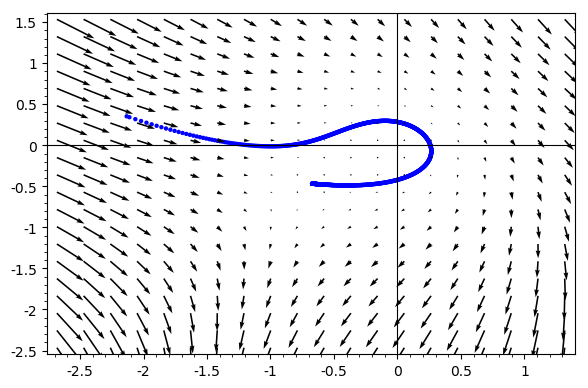

In [33]:
plot+sep5

In [34]:
kt=3.3;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [35]:
sol1=[[j,k] for i,j,k in sol]

In [36]:
if(vec[0][0]<0):
    sep6=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep6=list_plot(sol1,color="red")

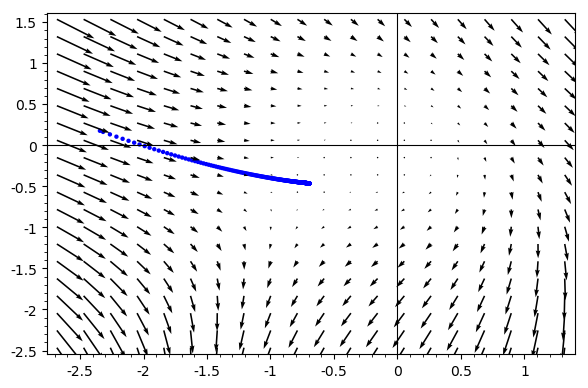

In [37]:
plot+sep6

In [38]:
kt=12;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [39]:
sol1=[[j,k] for i,j,k in sol]

In [40]:
if(vec[1][0]<0):
    sep7=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep7=list_plot(sol1,color="red")

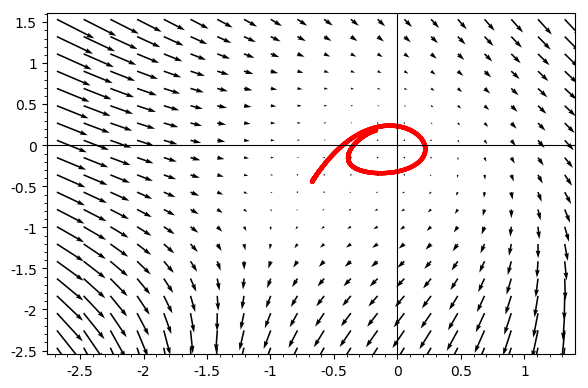

In [41]:
plot+sep7

In [42]:
kt=3.4;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [43]:
sol1=[[j,k] for i,j,k in sol]

In [44]:
if(vec[1][0]<0):
    sep8=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep8=list_plot(sol1,color="red")

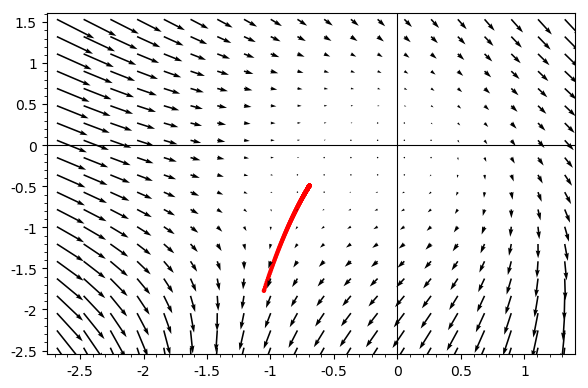

In [45]:
plot+sep8

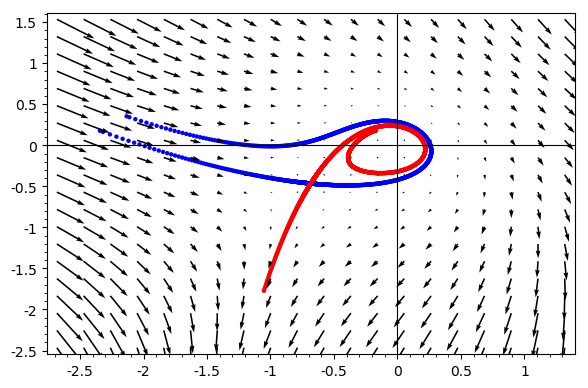

In [46]:
plot+sep5+sep6+sep7+sep8

In [47]:
# Amb el veiem aquí, i sapiguent que no hi ha més punts singulars, 
# ja podem saber que farà qualsevol altra òrbita que passi per un punt concret.

In [48]:
px=0;py=0.1;kt=7;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [50]:
sol1=[[j,k] for i,j,k in sol]

In [51]:
orb1=list_plot(sol1,color="yellow")

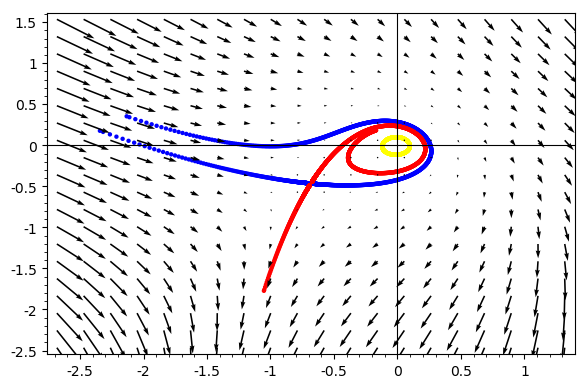

In [52]:
plot+sep5+sep6+sep7+sep8+orb1

In [53]:
sol1

[[0, 0.100000000000000],
 [0.000999487001331444, 0.09989510159847165],
 [0.001997896022858241, 0.09978041304133459],
 [0.002995149117389845, 0.09965594487047061],
 [0.003991168374637379, 0.09952170838740872],
 [0.004985875922675297, 0.09937771565194405],
 [0.005979193929412359, 0.09922397948075434],
 [0.006971044604073258, 0.0990605134460148],
 [0.007961350198692284, 0.09888733187401176],
 [0.008950033009620361, 0.0987044498437561],
 [0.009937015379046846, 0.09851188318559678],
 [0.01092221969653745, 0.0983096484798352],
 [0.01190556840058968, 0.09809776305534097],
 [0.01288698398020716, 0.09787624498816959],
 [0.01386638897649426, 0.09764511310018249],
 [0.01484370598427235, 0.09740438695767002],
 [0.01581885765371917, 0.09715408686997777],
 [0.01679176669203264, 0.09689423388813663],
 [0.01776235586512055, 0.09662484980349705],
 [0.01873054799931754, 0.09634595714636775],
 [0.01969626598313071, 0.09605757918465938],
 [0.02065943276901542, 0.09575973992253316],
 [0.02161997137518249, 

In [332]:
px=0.;py=0.01;kt=3;sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [333]:
sol1=[[j,k] for i,j,k in sol]

In [334]:
orb2=list_plot(sol1,color="yellow")

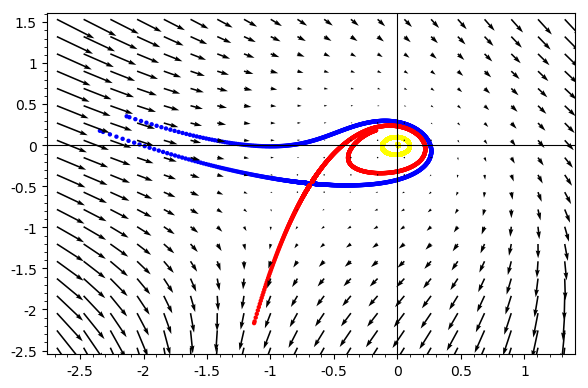

In [335]:
plot+sep5+sep6+sep7+sep8+orb1+orb2

In [336]:
sol1

[[0.000000000000000, 0.0100000000000000],
 [9.9999483670039e-06, 0.009999895001017065],
 [1.99997869360649e-05, 0.009999780004139784],
 [2.9999505909335e-05, 0.009999655009482791],
 [3.99990954890786e-05, 0.009999520017170516],
 [4.99985458776806e-05, 0.009999375027337184],
 [5.99978472776562e-05, 0.009999220040126816],
 [6.99969898916595e-05, 0.00999905505569323],
 [7.99959639224927e-05, 0.009998880074200033],
 [8.99947595731147e-05, 0.009998695095820635],
 [9.99933670466509e-05, 0.009998500120738234],
 [0.000109991776546401, 0.009998295149145828],
 [0.00011998997827585, 0.009998080181246208],
 [0.000129987962438676, 0.00999785521725196],
 [0.000139985719238756, 0.009997620257385459],
 [0.000149983238880182, 0.00999737530187888],
 [0.000159980511567265, 0.009997120350974189],
 [0.000169977527504544, 0.009996855404923146],
 [0.000179974276896798, 0.009996580463987303],
 [0.00018997074994905, 0.009996295528438006],
 [0.000199966936866583, 0.009996000598556393],
 [0.000209962827854942, 0